# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [160]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [24]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [162]:
spaceship.shape

(8693, 14)

**Check for data types**

In [164]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [166]:
missing_values = spaceship.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [168]:
spaceship_cleaned = spaceship.dropna()
spaceship_cleaned

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

And also lets define our target.

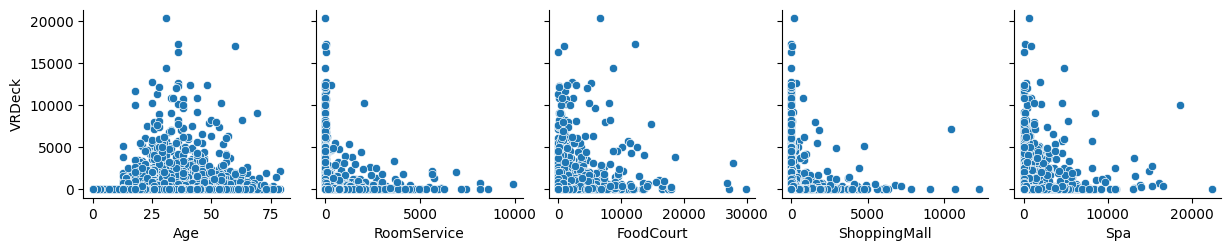

In [172]:
sns.pairplot(spaceship_numeric, y_vars=['VRDeck'], x_vars=spaceship_numeric.columns[:-1], kind='scatter')

In [246]:
features = spaceship_cleaned.drop(columns=['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'VIP', 'Destination', 'Name', 'Transported'])
features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [248]:
target = spaceship_cleaned['Transported']

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [250]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [252]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3432,32.0,0.0,0.0,0.0,0.0,0.0
7312,4.0,0.0,0.0,0.0,0.0,0.0
2042,30.0,0.0,236.0,0.0,1149.0,0.0
4999,17.0,13.0,0.0,565.0,367.0,1.0
5755,26.0,0.0,0.0,0.0,0.0,0.0


In [254]:
y_train.head()

3432    False
7312     True
2042    False
4999    False
5755     True
Name: Transported, dtype: bool

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [256]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)


In [258]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Fit the model to your data.

In [260]:
pred = knn.predict(X_test)
pred

array([ True,  True,  True, ...,  True,  True, False])

In [262]:
y_test.values

array([ True, False,  True, ...,  True,  True,  True])

Evaluate your model.

In [264]:
knn.score(X_test, y_test)

0.7337367624810892

**Congratulations, you have just developed your first Machine Learning model!**